## My own latex definitions
$$\gdef\mbf#1{\mathbf{#1}}$$

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('seaborn-whitegrid')

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten the first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

### Alternative interpretation: Find orthogonal projection that minimizes reconstruction error

$\def\mbf#1{\mathbf{#1}}$

- Find an orthogonal matrix $\mbf{U}\in \mathbb{R}^{D\times k}$ for which:


$$\arg\min_{\mbf{U}} \left\|  \mbf{X} - \mbf{U}\mbf{U}^T\mbf{X}\right\|_2^2 \\
\text{subject to} \quad \mbf{U}^T\mbf{U} = \mbf{I_k}
$$

- Both interpretations lead to the same results:
    - To compute $\mbf{U}$ you have to compute Eigendecomposition of covariance matrix $\frac{1}{N}\mbf{X}\mbf{X}^T$

![immagine.png](attachment:immagine.png)

# Matrix Calculus
Part of these lectures are taken from:

- [CS229 LinAlg](http://cs229.stanford.edu/summer2019/cs229-linalg.pdf)
- [CS229 Calculus Recap](https://www.youtube.com/watch?v=b0HvwszmqcQ)
- [Dive Into Deep Learning - Math Appendix](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/single-variable-calculus.html)

# Basic example: scalar to scalar

- **Function:** $f:\mathbb{R} \mapsto\mathbb{R}$
- **Example:** $f(x) = x^2$ 
- **Value taken (output):** scalar $\mathbb{R}$ 
- **First Derivative:** $f(x)^{\prime}$: $2x\in\mathbb{R}$
- **Second Derivative:** $f(x)^{\prime\prime}$: $2\in\mathbb{R}$       

# Vector to scalar

- **Function:** $f:\mathbb{R}^d \mapsto\mathbb{R}$
- **Example:** Loss or cost function
- **Value taken (output):** scalar $\mathbb{R}$ 
- **First Derivative:** $f(x)^{\prime}$: $\mathbb{R}^d$ **Gradient**
- **Second Derivative:** $f(x)^{\prime\prime}$: $\mathbb{R}^{d\times d}$ **Hessian** - Square and Symmetric Matrix

# Vector to vector

- **Function:** $f:\mathbb{R}^d \mapsto\mathbb{R}^p$
- **Example:** projection / neural network layer / classifier input vector to 1...N classes
- **Value taken (output):** vector $\mathbb{R}^p$ 
- **First Derivative:** $f(x)^{\prime}$: $\mathbb{R}^{d\times p}$ **Jacobian**
- **Second Derivative:** $f(x)^{\prime\prime}$: $\mathbb{R}^{d\times d \times p}$ **Tensor of second derivative** (high order tensor)
<br/><br/>

- Informally: a **tensor** is a generalization of matrices in N-D dimensions
 - Ex: if you stack N `256x256` images you get `Nx256x256` which is a tensor.

# Why Calculus?


- Let's take a complex function $$f(x) = \sin(x^x)$$ over the $[0, 3]$. 
- Its behaviour is not simple to understand.

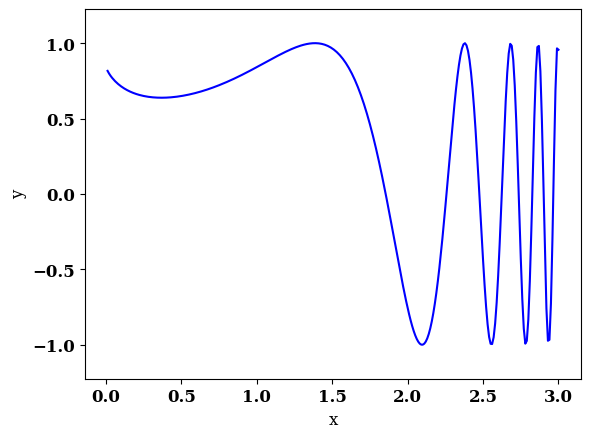

In [6]:
x_big = np.arange(0.01, 3.01, 0.01)
ys = np.sin(x_big**x_big)
_ = plt.plot(x_big, ys, 'b-')
plt.xlabel('x');plt.ylabel('y');
_ = plt.axis('equal')

- At this large scale, the function’s behavior is not simple. 
- However, if we **reduce our range to something smaller like**  $[1.75, 2.25]$ , we see that the graph becomes much simpler.
- You can think as if we are zooming into a small part of it

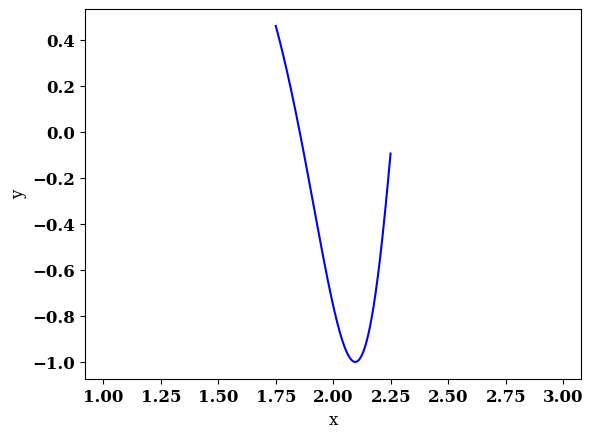

In [7]:
x_med = np.arange(1.75, 2.25, 0.001)
ys = np.sin(x_med**x_med)
_ = plt.plot(x_med, ys, 'b-')
plt.xlabel('x');plt.ylabel('y');
_ = plt.axis('equal')

Taking this to an extreme, if we zoom into a **tiny segment**, the behavior becomes far simpler: **it is just a straight line.**

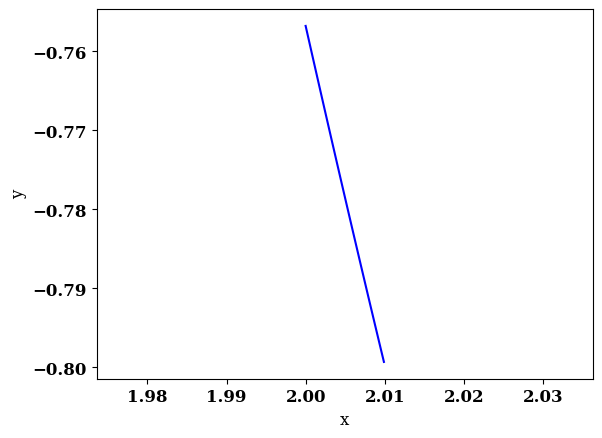

In [8]:
x_small = np.arange(2.0, 2.01, 0.0001)
ys = np.sin(x_small**x_small)
_ = plt.plot(x_small, ys, 'b-')
plt.xlabel('x');plt.ylabel('y');
_ = plt.axis('equal')

- This is the key observation of single variable calculus: **the behavior of familiar functions can be modeled by a line in a small enough range.**  

- This means that for most functions, it is reasonable to expect that as **we shift the $x$ value of the function by a little bit**, the **output $f(x)$ will also be shifted** by a little bit.

- The only question we need to answer is, _"How large is the change in the output compared to the change in the input?  Is it half as large?  Twice as large?"_

Thus, we can consider the ratio of the change in the output of a function for a small change in the input of the function.  We can write this formally as

$$
\frac{L(x+\epsilon) - L(x)}{(x+\epsilon) - x} = \frac{L(x+\epsilon) - L(x)}{\epsilon}.
$$

$$\frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon}.$$

Different texts will use different notations for the derivative. For instance, all of the below notations indicate the same thing:

$$
\frac{df}{dx} = \frac{d}{dx}f = f' = \nabla_xf = D_xf = f_x.
$$

## Finite Difference

- Take a value $\mbf{x}$ and see how the function $f(\mbf{x}+\epsilon)$ changes in the neighborhood of that value under small perturbation $\epsilon$.

- Is this a good method?

- NO! Super slow, there is no optimization.

### Linear Approximation

When working with derivatives, it is often useful to geometrically interpret the approximation used above.  In particular, note that the equation 

$$
f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x),
$$

### Linear Approximation
Approximates the value of $f$ by:
- a line which passes through the point $(x, f(x))$
- has slope $\frac{df}{dx}(x)$

in a neighbourhood $[-\epsilon,+\epsilon]$

In this way we say that the derivative gives a linear approximation to the function $f$, as illustrated below:

![image.png](attachment:image.png)

# Gradient

$\def\der#1#2{\frac{\partial #1}{\partial #2}}$
$\def\derr#1#2#3{\frac{\partial^2 #1}{\partial#2\partial #3}}$

- **Function:** $f:\mathbb{R}^d \mapsto\mathbb{R}$

$$\nabla_{\mbf{x}}f(\mbf{x}) = \nabla_{\mbf{x}}f\left([x_1,\ldots,x_d]\right) = \left[\der{f\left(\mbf{x}\right)}{x_1},...,\der{f\left(\mbf{x}\right)}{x_d} \right]^T$$

- Geometric Interpretation
    - **Direction of steepest ascent**.
    - The direction to change the input so that the function values go up in $[x,x+\epsilon]$
    
    $$f\Big(\mbf{x} + \epsilon\nabla_{\mbf{x}}f(\mbf{x})\Big) \ge f(\mbf{x})$$
    - Gradient can be defined for matrices too not only vector $\nabla_{\mbf{X}}f(\mbf{X})$
    - Just think of the matrix as a long, stretched vector

<img width="70%" src="figs/gradients.png" />

[Figure credit](https://people.csail.mit.edu/jsolomon/share/book/numerical_book.pdf)

<img width='30%' src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Gradient2.svg/1920px-Gradient2.svg.png" />

The gradient, represented by the blue arrows, denotes the **direction of greatest change of a scalar function**. The values of the function are represented in **grayscale and increase in value from white (low) to dark (high)**.

Figure credit Wikipedia

## Try it yourself - Gradient of dot product

Given the function $f(\mbf{x};\mbf{b})= \mbf{b}^T\mbf{x}$ parametrized by the vector $\mbf{b}$ that takes as input a vector $\mbf{x}$---both vectors in $\mbf{x}^d$---compute the gradient of x $$\nabla_\mbf{x} f(\mbf{x}) = \nabla_\mbf{x} \mbf{b}^T\mbf{x}$$

# Hessian

- **Function:** $f:\mathbb{R}^d \mapsto\mathbb{R}$

$$\nabla^2_{\mbf{x}}f(\mbf{x}) = \nabla^2_{\mbf{x}}f\left([x_1,\ldots,x_d]\right) =
\begin{bmatrix}
\derr{f\left(\mbf{x}\right)}{x_1}{x_1} & \ldots & \derr{f\left(\mbf{x}\right)}{x_1}{x_d} \\
\ldots &      & \ldots \\
\derr{f\left(\mbf{x}\right)}{x_d}{x_1} & \ldots & \derr{f\left(\mbf{x}\right)}{x_d}{x_d} \\
\end{bmatrix}
$$

- Geometric Interpretation
    - **Indicates the curvature of the function** (can tell you if you are close to local minimum/maximum or saddle point)
    - Can be interpreted as the **Jacobian matrix of the gradient of the function**
    - Symmetric and Square


# Quadratic Forms


Given $\mbf{A} \in \mathbb{R}^{d\times d}$ symmetric and square and $\mbf{x} \in \mathbb{R}^d$ then a quadratic form is:
$$\mbf{x}^T \mbf{A}\mbf{x}$$

- It is a vector to scalar function
- It is used for characterizing the **definiteness** of matrices
- Symmetry of A is not required, actually: just compute $\frac{1}{2}\mathbf{x^T}(\mathbf{A+A^T})\mathbf{x}$

# Definiteness and relation with Eigenvalues

- $\forall \mbf{x} \neq 0 \qquad \mbf{x}^T \mbf{A}\mbf{x} \gt 0 $ is **positive definite (PD)** - Relation with eigenvalues all positive
- $\forall \mbf{x} \neq 0 \qquad \mbf{x}^T \mbf{A}\mbf{x} \ge 0 $ is **positive semi-definite (PSD)** - Relation with eigenvalues all non-negative
- $\forall \mbf{x} \neq 0 \qquad \mbf{x}^T \mbf{A}\mbf{x} \lt 0 $ is **negative definite (ND)** - Relation with eigenvalues all negative
- $\forall \mbf{x} \neq 0 \qquad \mbf{x}^T \mbf{A}\mbf{x} \le 0 $ is **negative semi-definite (NSD)** - Relation with eigenvalues all non-positive

- $\forall \mbf{x} \neq 0 \qquad \mbf{x}^T \mbf{A}\mbf{x} \lt, \gt 0 $ is **indefinite** - Relation with eigenvalues mixed in sign

<img width='70%' src="figs/definitiviness.png" />

### Common Derivatives

* **Derivative of constants.** $\frac{d}{dx}c = 0$.
* **Derivative of linear functions.** $\frac{d}{dx}(ax) = a$.
* **Power rule.** $\frac{d}{dx}x^n = nx^{n-1}$.
* **Derivative of exponentials.** $\frac{d}{dx}e^x = e^x$.
* **Derivative of the logarithm.** $\frac{d}{dx}\log(x) = \frac{1}{x}$.

### Derivative Rules

- **Important: Derivation is a linear operator.**
1. Derivative of the sum is the sum of derivatives
2. Derivative of a scalar product is the scalar product of derivative.

* **Sum rule.** $\qquad\nabla_{\mbf{x}} \left( g(\mbf{x}) + h(\mbf{x}) \right) = \nabla_{\mbf{x}}g(\mbf{x}) + \nabla_{\mbf{x}}h(\mbf{x})  $
* **Product rule.** $\qquad\nabla_{\mbf{x}} \left(g(\mbf{x})\cdot h(\mbf{x})\right) = \nabla_{\mbf{x}}[g(\mbf{x})]h(\mbf{x}) + \nabla_{\mbf{x}}[h(\mbf{x})]g(\mbf{x})$
* **Chain rule.** $\qquad\nabla_{\mbf{x}} g(h(\mbf{x})) = \nabla_{h(\mbf{x})} [g(h(\mbf{x}))]\cdot\nabla_{\mbf{x}}h(\mbf{x})\qquad$ **Very important for Deep Learning**

## Try it yourself

Compute $\nabla_{\mbf{x}}\mbf{x}^T\mbf{A}\mbf{x}$.

Can be seen as $\mbf{x}^T\mbf{f(x)}$ where $\mbf{f(x)} = \mbf{A}\mbf{x}$

$\nabla_{\mbf{x}}\mbf{x}^T\mbf{A}\mbf{x} = (\mathbf{A} + \mathbf{A^T})\mathbf{x}$